In [6]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/sales-dataset/sales_data.csv


## Import necessary libraries

In [103]:
from scipy import stats
import itertools
import matplotlib.pyplot as plt
import seaborn as sns

In [19]:
sales_df = pd.read_csv('/kaggle/input/sales-dataset/sales_data.csv')

In [20]:
sales_df.head()

,Product_ID,Sale_Date,Sales_Rep,Region,Sales_Amount,Quantity_Sold,Product_Category,Unit_Cost,Unit_Price,Customer_Type,Discount,Payment_Method,Sales_Channel,Region_and_Sales_Rep
0,1052,2023-02-03,Bob,North,5053.97,18,Furniture,152.75,267.22,Returning,0.09,Cash,Online,North-Bob
1,1093,2023-04-21,Bob,West,4384.02,17,Furniture,3816.39,4209.44,Returning,0.11,Cash,Retail,West-Bob
2,1015,2023-09-21,David,South,4631.23,30,Food,261.56,371.40,Returning,0.20,Bank Transfer,Retail,South-David
3,1072,2023-08-24,Bob,South,2167.94,39,Clothing,4330.03,4467.75,New,0.02,Credit Card,Retail,South-Bob
4,1061,2023-03-24,Charlie,East,3750.20,13,Electronics,637.37,692.71,New,0.08,Credit Card,Online,East-Charlie


Columns in the Dataset


* **Product_ID**: Unique identifier for each product sold. Randomly generated for practice purposes.
* **Sale_Date**: The date when the sale occurred. Randomly selected from the year 2023.
* **Sales_Rep**: The sales representative responsible for the transaction. The dataset includes five random sales representatives (Alice, Bob, Charlie, David, Eve).
* **Region**: The region where the sale took place. The possible regions are North, South, East, and West.
* **Sales_Amount**: The total sales amount for the transaction, including discounts if any. Values range from 100 to 10,000 (in currency units).
* **Quantity_Sold**: The number of units sold in that transaction, randomly generated between 1 and 50.
* **Product_Category**: The category of the product sold. Categories include Electronics, Furniture, Clothing, and Food.
* **Unit_Cost**: The cost per unit of the product sold, randomly generated between 50 and 5000 currency units.
* **Unit_Price**: The selling price per unit of the product, calculated to be higher than the unit cost.
* **Customer_Type**: Indicates whether the customer is a New or Returning customer.
* **Discount**: The discount applied to the sale, randomly chosen between 0% and 30%.
* **Payment_Method**: The method of payment used by the customer (e.g., Credit Card, Cash, Bank Transfer).
* **Sales_Channel**: The channel through which the sale occurred. Either Online or Retail.
* **Region_and_Sales_Rep**: A combined column that pairs the region and sales representative for easier tracking.


In [21]:
sales_df.isnull().sum()

Product_ID              0
Sale_Date               0
Sales_Rep               0
Region                  0
Sales_Amount            0
Quantity_Sold           0
Product_Category        0
Unit_Cost               0
Unit_Price              0
Customer_Type           0
Discount                0
Payment_Method          0
Sales_Channel           0
Region_and_Sales_Rep    0
dtype: int64

## Explore Data

In [22]:
sales_df.describe()

,Product_ID,Sales_Amount,Quantity_Sold,Unit_Cost,Unit_Price,Discount
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000
mean,1050.128000,5019.265230,25.355000,2475.304550,2728.440120,0.15239
std,29.573505,2846.790126,14.159006,1417.872546,1419.399839,0.08720
min,1001.000000,100.120000,1.000000,60.280000,167.120000,0.00000
25%,1024.000000,2550.297500,13.000000,1238.380000,1509.085000,0.08000
50%,1051.000000,5019.300000,25.000000,2467.235000,2696.400000,0.15000
75%,1075.000000,7507.445000,38.000000,3702.865000,3957.970000,0.23000
max,1100.000000,9989.040000,49.000000,4995.300000,5442.150000,0.30000


In [23]:
sales_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Product_ID            1000 non-null   int64  
 1   Sale_Date             1000 non-null   object 
 2   Sales_Rep             1000 non-null   object 
 3   Region                1000 non-null   object 
 4   Sales_Amount          1000 non-null   float64
 5   Quantity_Sold         1000 non-null   int64  
 6   Product_Category      1000 non-null   object 
 7   Unit_Cost             1000 non-null   float64
 8   Unit_Price            1000 non-null   float64
 9   Customer_Type         1000 non-null   object 
 10  Discount              1000 non-null   float64
 11  Payment_Method        1000 non-null   object 
 12  Sales_Channel         1000 non-null   object 
 13  Region_and_Sales_Rep  1000 non-null   object 
dtypes: float64(4), int64(2), object(8)
memory usage: 109.5+ KB


## Statistical Analysis

In [24]:
mean_of_Price = sales_df['Unit_Price'].mean()
mean_of_Price

2728.44012

In [25]:
mean_of_Discount = sales_df['Discount'].mean()
Discount_mean = mean_of_Discount*100 
Discount_mean

15.238999999999999

As example if we take a price of 20$ of a electronic accessories, the Discount will be : **20*0.15**

In [26]:
customer_counts = sales_df['Customer_Type'].value_counts()

count_of_returning = customer_counts.get('Returning', 0)
count_of_new = customer_counts.get('New', 0) 

print(f'Number of Returning Customers: {count_of_returning}')
print(f'Number of New Customers: {count_of_new}')


Number of Returning Customers: 496
Number of New Customers: 504


In [27]:
sales_df.columns

Index(['Product_ID', 'Sale_Date', 'Sales_Rep', 'Region', 'Sales_Amount',
       'Quantity_Sold', 'Product_Category', 'Unit_Cost', 'Unit_Price',
       'Customer_Type', 'Discount', 'Payment_Method', 'Sales_Channel',
       'Region_and_Sales_Rep'],
      dtype='object')

In [55]:
Categs = sales_df['Product_Category'].unique()
Categs[0]

'Furniture'

### A T-test for two categories

In [84]:
Categ_per_sales = []
for i in range(len(Categs)):
    Categ_per_sales.append(sales_df[sales_df['Product_Category'] == Categs[i]]['Sales_Amount'])

t_stat, p_value = stats.ttest_ind(Categ_per_sales[0], Categ_per_sales[1])

print(f'T-statistic: {t_stat}, P-value: {p_value} ')
#result interpretation

# Interpret the results
if p_value < 0.05:
    print(f"There is a significant difference in sales amounts between {Categs[0]} and {Categs[1]}.")
else:
    print(f"There is no significant difference in sales amounts between {Categs[0]} and {Categs[1]}.")

T-statistic: -1.8223107055511867, P-value: 0.06902477378681539 
There is no significant difference in sales amounts between Furniture and Food.


### Let's perform a pairwise t-tests


In [91]:
results = []
for (i, j) in itertools.combinations(range(len(Categ_per_sales)), 2):
    t_stat, p_value = stats.ttest_ind(Categ_per_sales[i], Categ_per_sales[j])
    results.append((Categs[i], Categs[j], t_stat, p_value))
    
#let's print results
for cat1, cat2, t_stat, p_value in results:
    print(f'Test between {cat1} and {cat2}: T-statistic = {t_stat}, P-value = {p_value}')
    if p_value < 0.05:
        print(f"There is a significant difference in sales amounts between {cat1} and {cat2}.")
    else:
        print(f"There is no significant difference in sales amounts between {cat1} and {cat2}.")

Test between Furniture and Food: T-statistic = -1.8223107055511867, P-value = 0.06902477378681539
There is no significant difference in sales amounts between Furniture and Food.
Test between Furniture and Clothing: T-statistic = -0.21267243371796737, P-value = 0.8316648623084711
There is no significant difference in sales amounts between Furniture and Clothing.
Test between Furniture and Electronics: T-statistic = -0.806536317607999, P-value = 0.4203140862406771
There is no significant difference in sales amounts between Furniture and Electronics.
Test between Food and Clothing: T-statistic = 1.6427452540698293, P-value = 0.10107456546253474
There is no significant difference in sales amounts between Food and Clothing.
Test between Food and Electronics: T-statistic = 1.0063067867121704, P-value = 0.31478580794411865
There is no significant difference in sales amounts between Food and Electronics.
Test between Clothing and Electronics: T-statistic = -0.6097509284832905, P-value = 0.5422

In [35]:
New_costumers = sales_df[sales_df['Customer_Type'] == 'New']['Sales_Amount']
Retruning_costumers = sales_df[sales_df['Customer_Type'] == 'Returning']['Sales_Amount']

t_stat, p_value = stats.ttest_ind(New_costumers, Retruning_costumers)

print(f'T-statistic: {t_stat}, P-value: {p_value}')

# Interpret the results
if p_value < 0.05:
    print("There is a significant difference in sales amounts between new and returning customers.")
else:
    print("There is no significant difference in sales amounts between new and returning customers.")

T-statistic: -0.5208327831434366, P-value: 0.6025987977633167
There is no significant difference in sales amounts between new and returning customers.


In [112]:
sales_df.columns

Index(['Product_ID', 'Sale_Date', 'Sales_Rep', 'Region', 'Sales_Amount',
       'Quantity_Sold', 'Product_Category', 'Unit_Cost', 'Unit_Price',
       'Customer_Type', 'Discount', 'Payment_Method', 'Sales_Channel',
       'Region_and_Sales_Rep'],
      dtype='object')

Text(0.5, 1.0, 'Means Sales Per Region')

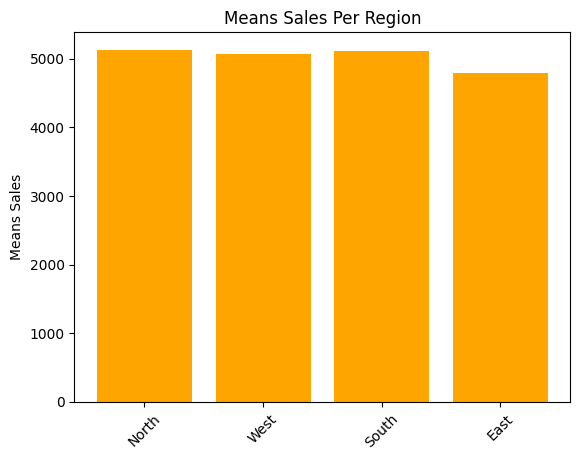

In [130]:
regions = sales_df.Region.unique()
region_type = []
for i in range(len(regions)):
    region_type.append(sales_df[sales_df['Region'] == regions[i]]['Sales_Amount'])
    
means  = [np.mean(sales) for sales in region_type]

plt.bar(regions,means, color='orange')
plt.ylabel('Means Sales')
plt.xticks(rotation = 45)
plt.title('Means Sales Per Region')

## Visualisation

Text(0.5, 1.0, 'Mean Sales by Category with Error Bars')

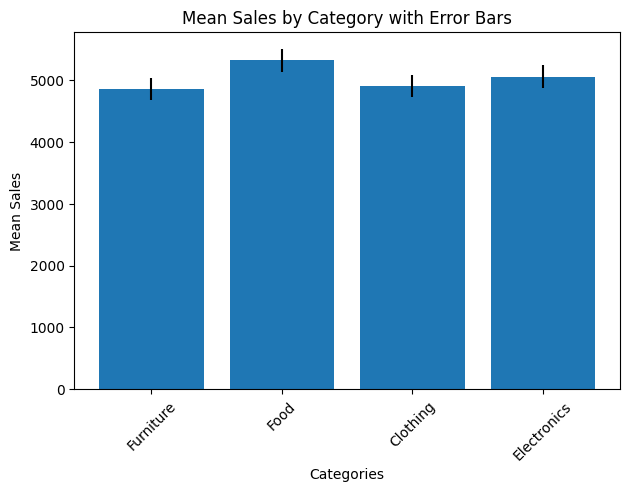

In [102]:
means = [np.mean(sales) for sales in Categ_per_sales]
errors = [np.std(sales) / np.sqrt(len(sales)) for sales in Categ_per_sales]
plt.bar(Categs, means, yerr = errors)
plt.xlabel('Categories')
plt.ylabel('Mean Sales')
plt.xticks(rotation=45)
plt.tight_layout()
plt.title('Mean Sales by Category with Error Bars')

### Aggregate Sales by Region and Category

In [139]:
sales_df.head()

# Group by Region and Category, then sum the Sales
grouped_sales = sales_df.groupby(['Region', 'Product_Category'])['Sales_Amount'].sum().reset_index()
grouped_sales

,Region,Product_Category,Sales_Amount
0,East,Clothing,356670.40
1,East,Electronics,303101.42
2,East,Food,325864.87
3,East,Furniture,274156.24
4,North,Clothing,372977.22
5,North,Electronics,342666.29
6,North,Food,258985.65
7,North,Furniture,394983.35
8,South,Clothing,269517.74
9,South,Electronics,293663.96


In [146]:
# find the most Bought category based on each country 
most_bought = grouped_sales.loc[grouped_sales.groupby('Region')['Sales_Amount'].idxmax()]
most_bought


,Region,Product_Category,Sales_Amount
0,East,Clothing,356670.40
7,North,Furniture,394983.35
10,South,Food,301187.51
14,West,Food,315735.51


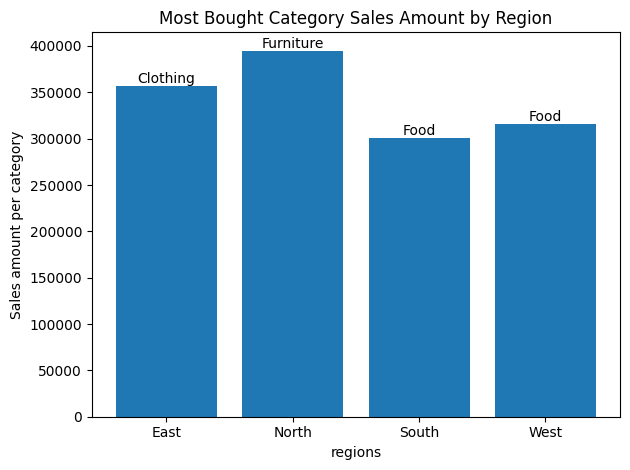

In [148]:
plt.bar(most_bought['Region'], most_bought['Sales_Amount'])
plt.xlabel('regions')
plt.ylabel('Sales amount per category')
plt.title('Most Bought Category Sales Amount by Region')

for i, (region, sales, category) in enumerate(zip(most_bought['Region'], most_bought['Sales_Amount'], most_bought['Product_Category'])):
    plt.text(i, sales + 10, f'{category}', ha='center', va='bottom')

plt.tight_layout()
plt.show()

In [156]:
sales_df.head()
sales_channel = sales_df.Sales_Channel.unique()
sales_channel

array(['Online', 'Retail'], dtype=object)

([<matplotlib.patches.Wedge at 0x7baafee3dcc0>,
 [Text(-1.099218420618879, 0.04145918200033708, 'Online'),
  Text(1.0992184245005632, -0.041459079084081064, 'Retail')],
 [Text(-0.599573683973934, 0.022614099272911133, '48.8%'),
  Text(0.5995736860912162, -0.022614043136771487, '51.2%')])

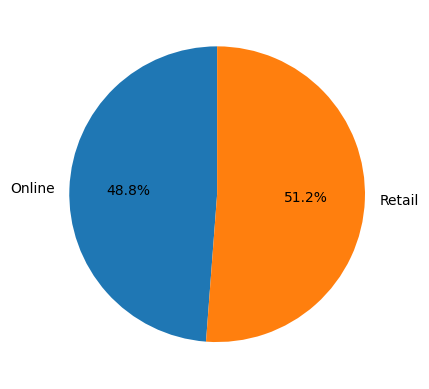

In [170]:
online = sales_df['Sales_Channel'].value_counts().get('Online', 0)
offline = sales_df['Sales_Channel'].value_counts().get('Retail', 0)

online, offline
fig, ax = plt.subplots()
ax.pie([online, offline], labels=['Online', 'Retail'], autopct='%1.1f%%', startangle=90)

# Feature engineering

In [179]:
# One-Hot encoding
#sales_df = pd.get_dummies(sales_df, columns = ['Sales_Channel'])

,Product_ID,Sale_Date,Sales_Rep,Region,Sales_Amount,Quantity_Sold,Product_Category,Unit_Cost,Unit_Price,Customer_Type,Discount,Payment_Method,Region_and_Sales_Rep,Sales_Channel_Online,Sales_Channel_Retail
0,1052,2023-02-03,Bob,North,5053.97,18,Furniture,152.75,267.22,Returning,0.09,Cash,North-Bob,True,False
1,1093,2023-04-21,Bob,West,4384.02,17,Furniture,3816.39,4209.44,Returning,0.11,Cash,West-Bob,False,True
2,1015,2023-09-21,David,South,4631.23,30,Food,261.56,371.40,Returning,0.20,Bank Transfer,South-David,False,True
3,1072,2023-08-24,Bob,South,2167.94,39,Clothing,4330.03,4467.75,New,0.02,Credit Card,South-Bob,False,True
4,1061,2023-03-24,Charlie,East,3750.20,13,Electronics,637.37,692.71,New,0.08,Credit Card,East-Charlie,True,False


In [202]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
#Label Encoding 
Products_categories = label_encoder.fit_transform(sales_df['Product_Category'])

In [180]:
sales_df.Sale_Date

0      2023-02-03
1      2023-04-21
2      2023-09-21
3      2023-08-24
4      2023-03-24
          ...    
995    2023-04-15
996    2023-09-07
997    2023-04-27
998    2023-12-20
999    2023-08-16
Name: Sale_Date, Length: 1000, dtype: object

## Scaling Features

In [181]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
sales_df[['Sales_Amount']] = scaler.fit_transform(sales_df[['Sales_Amount']])

### 1. **Sales Prediction**
   - **Objective**: Predict future sales amounts based on historical data.
   - **Model**: 
     - **Linear Regression**: A good starting point for predicting continuous values like sales amounts.
     - **Random Forest Regressor**: Can capture non-linear relationships and interactions between features.
     - **XGBoost**: An efficient and powerful gradient boosting framework that often performs well in regression tasks.

### 2. **Customer Segmentation**
   - **Objective**: Segment customers into different groups based on their purchasing behavior.
   - **Model**:
     - **K-Means Clustering**: A popular clustering algorithm to group customers based on features like `Sales_Amount`, `Quantity_Sold`, and `Discount`.
     - **Hierarchical Clustering**: Another clustering method that can provide insights into customer segments.

### 3. **Sales Channel Effectiveness**
   - **Objective**: Analyze which sales channel (Online vs. Retail) is more effective in terms of sales amount.
   - **Model**:
     - **Logistic Regression**: If you want to predict the likelihood of a sale being made through a particular channel based on other features.
     - **Decision Trees**: To visualize and understand the decision-making process behind sales channel effectiveness.

### 4. **Sales Representative Performance**
   - **Objective**: Evaluate the performance of different sales representatives.
   - **Model**:
     - **ANOVA (Analysis of Variance)**: To compare the sales amounts across different sales representatives.
     - **Random Forest Classifier**: If you want to classify sales representatives based on their performance metrics.

### 5. **Discount Impact Analysis**
   - **Objective**: Understand how discounts affect sales amounts.
   - **Model**:
     - **Multiple Linear Regression**: To analyze the relationship between `Discount` and `Sales_Amount`, controlling for other variables.
     - **Regression Trees**: To capture non-linear relationships between discounts and sales.

### 6. **Churn Prediction**
   - **Objective**: Predict whether a customer is likely to return based on their purchase history.
   - **Model**:
     - **Logistic Regression**: To predict the probability of a customer being new or returning based on their purchase behavior.
     - **Random Forest Classifier**: To improve prediction accuracy and handle feature interactions.

### Data Preprocessing Steps
Before training any model, consider the following preprocessing steps:
- **Encoding Categorical Variables**: Convert categorical variables like `Sales_Rep`, `Region`, `Product_Category`, `Customer_Type`, `Payment_Method`, and `Sales_Channel` into numerical format using techniques like one-hot encoding or label encoding.
- **Handling Missing Values**: Check for and handle any missing values in the dataset.
- **Feature Scaling**: Normalize or standardize numerical features like `Sales_Amount`, `Unit_Cost`, and `Unit_Price` if necessary.
- **Feature Engineering**: Create new features if needed, such as total profit (calculated as `Sales_Amount - (Quantity_Sold * Unit_Cost)`).


In [185]:
sales_df.head()

,Product_ID,Sale_Date,Sales_Rep,Region,Sales_Amount,Quantity_Sold,Product_Category,Unit_Cost,Unit_Price,Customer_Type,Discount,Payment_Method,Region_and_Sales_Rep,Sales_Channel_Online,Sales_Channel_Retail
0,1052,2023-02-03,Bob,North,0.012197,18,Furniture,152.75,267.22,Returning,0.09,Cash,North-Bob,True,False
1,1093,2023-04-21,Bob,West,-0.223256,17,Furniture,3816.39,4209.44,Returning,0.11,Cash,West-Bob,False,True
2,1015,2023-09-21,David,South,-0.136374,30,Food,261.56,371.40,Returning,0.20,Bank Transfer,South-David,False,True
3,1072,2023-08-24,Bob,South,-1.002094,39,Clothing,4330.03,4467.75,New,0.02,Credit Card,South-Bob,False,True
4,1061,2023-03-24,Charlie,East,-0.446011,13,Electronics,637.37,692.71,New,0.08,Credit Card,East-Charlie,True,False


In [203]:
sales_df.head()

,Product_ID,Sale_Date,Sales_Rep,Region,Sales_Amount,Quantity_Sold,Product_Category,Unit_Cost,Unit_Price,Customer_Type,Discount,Payment_Method,Region_and_Sales_Rep,Sales_Channel_Online,Sales_Channel_Retail,products_categ
0,1052,2023-02-03,Bob,North,0.012197,18,Furniture,152.75,267.22,Returning,0.09,Cash,North-Bob,True,False,3
1,1093,2023-04-21,Bob,West,-0.223256,17,Furniture,3816.39,4209.44,Returning,0.11,Cash,West-Bob,False,True,3
2,1015,2023-09-21,David,South,-0.136374,30,Food,261.56,371.40,Returning,0.20,Bank Transfer,South-David,False,True,2
3,1072,2023-08-24,Bob,South,-1.002094,39,Clothing,4330.03,4467.75,New,0.02,Credit Card,South-Bob,False,True,0
4,1061,2023-03-24,Charlie,East,-0.446011,13,Electronics,637.37,692.71,New,0.08,Credit Card,East-Charlie,True,False,1


In [208]:
X = sales_df.drop(columns=['Sales_Amount', 'Product_ID', 'Sale_Date', 'Region_and_Sales_Rep', 'Region','Product_Category','Customer_Type','Payment_Method' , 'Sales_Rep'])
y = sales_df['Sales_Amount']

In [209]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

## Regression Model

In [210]:
from sklearn.linear_model import LinearRegression

Linear_model = LinearRegression()
Linear_model.fit(x_train, y_train)

LinearRegression()

In [212]:
from sklearn.ensemble import RandomForestRegressor
# Random Forest Regressor
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(x_train, y_train)

RandomForestRegressor(random_state=42)

### Make Predictions


In [215]:
y_pred_linear = Linear_model.predict(x_test)
y_pred_rf = rf_model.predict(x_test)

### Evaluate the Model

In [230]:
from sklearn.metrics import mean_squared_error, r2_score
# Let's Evaluate linear regression
mse_linear = mean_squared_error(y_test, y_pred_linear)
r2_linear = r2_score(y_test, y_pred_linear)

print(f'Mean squared error: {mse_linear}')
print(f'Score R2: {r2_linear}')

Mean squared error: 1.1563266656868076
Score R2: -0.013031292107972936


In [229]:
# Let's evaluate random forest regression

mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print(f'Mean squared error: {mse_rf}')
print(f'Score R2: {r2_rf}')

Mean squared error: 1.2409866057028045
Score R2: -0.08719992539227883


 ### Visualisation of prediction

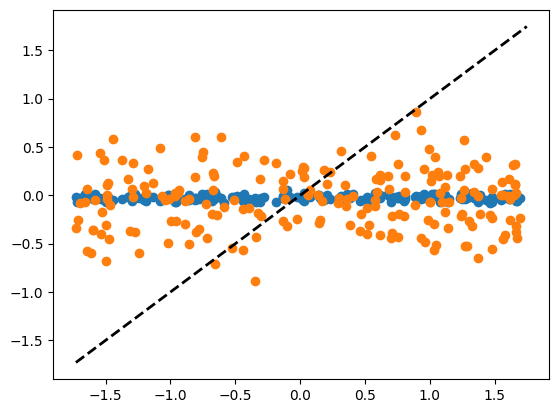

In [227]:
### plt.scatter(y_test, y_pred_linear, label = 'linear regression predictions')
plt.scatter(y_test, y_pred_linear, label = 'Linear regression predictions')
plt.scatter(y_test, y_pred_rf, label = 'Rnadom forest predictions')
plt.plot([y.min(), y.max()], [y.min(), y.max()], "k--", lw=2)